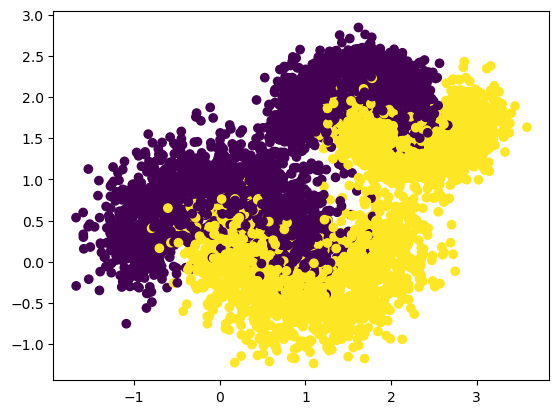

In [45]:
import numpy as np 
from sklearn.datasets import make_moons, make_circles
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



# data = make_circles(n_samples=3000, noise=0.1, random_state=0)
# data2 = make_circles(n_samples=3000, noise=0.1, random_state=1, factor=0.5)

data = make_moons(n_samples=3000, noise=0.3, random_state=0)
data2 = make_moons(n_samples=3000, noise=0.3, random_state=1)

X = np.concatenate([data[0], data2[0] / 1.5 + 1.6]) 
y = np.concatenate([data[1], data2[1]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize the data to 0-1
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())


def plot_decision_boundary(m, X, y):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = m.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y)


plt.scatter(X[:,0], X[:,1], c=y)
plt.savefig('data.png')

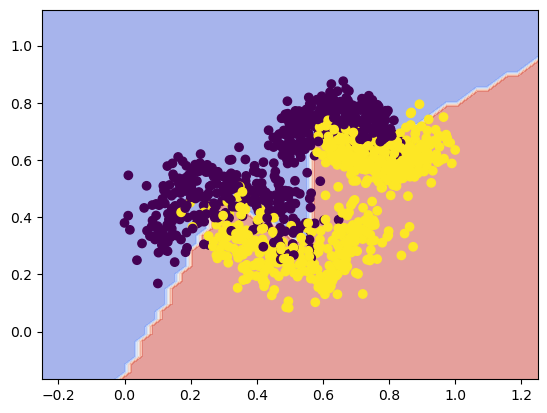

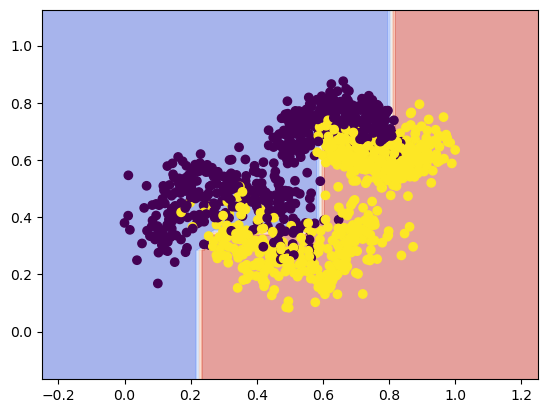

In [46]:
modelMLP = MLPClassifier(hidden_layer_sizes=(50,20, 5), max_iter=1000, learning_rate_init=0.01, solver='adam', random_state=0, activation='relu')
modelMLP.fit(X_train, y_train)

model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model_rf.fit(X_train, y_train)

plot_decision_boundary(modelMLP, X_test, y_test)
plt.show()

plot_decision_boundary(model_rf, X_test, y_test)
plt.show()

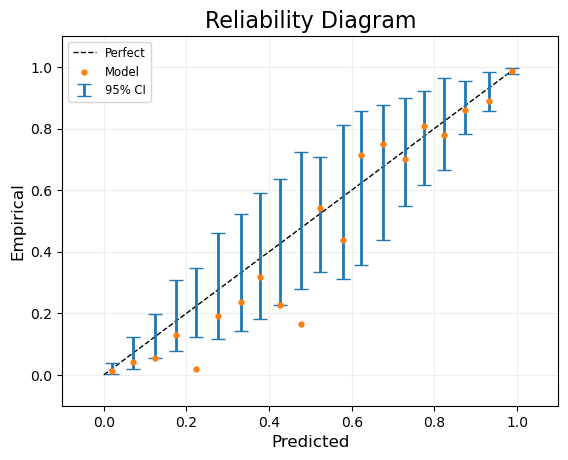

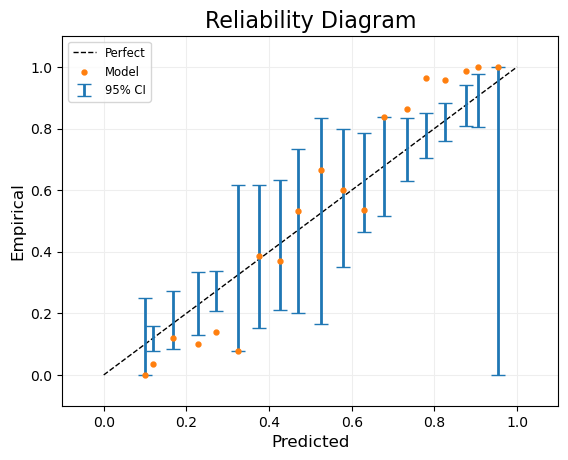

In [47]:
import ml_insights as mli

MLP_preds_uncalib = modelMLP.predict_proba(X_test)[:,1]
RF_preds_uncalib = model_rf.predict_proba(X_test)[:,1]

mli.plot_reliability_diagram(y_test, MLP_preds_uncalib, marker='.')
plt.show()

mli.plot_reliability_diagram(y_test, RF_preds_uncalib, marker='.')
plt.show()

Model: MLPClassifier
Calibration curve


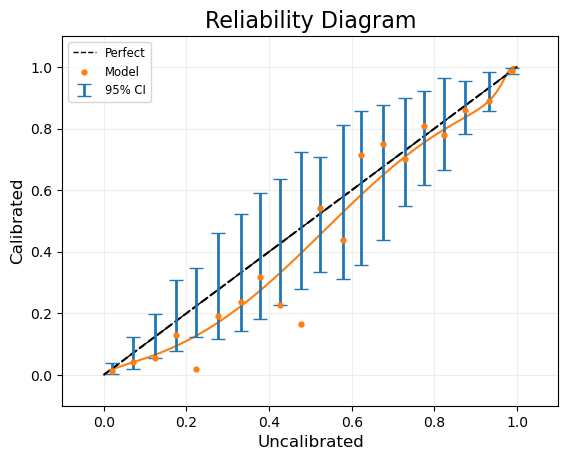

Calibrated probabilities


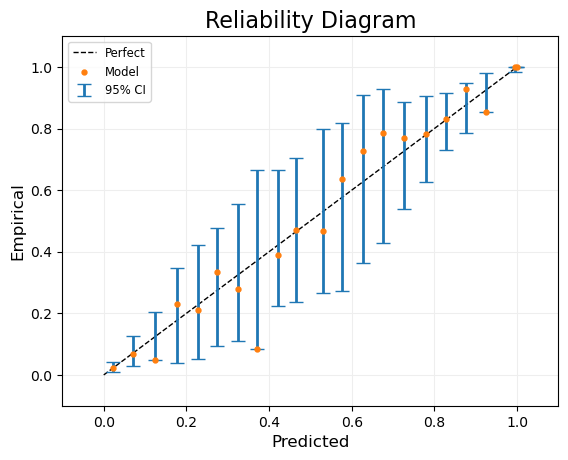

Model: RandomForestClassifier
Calibration curve


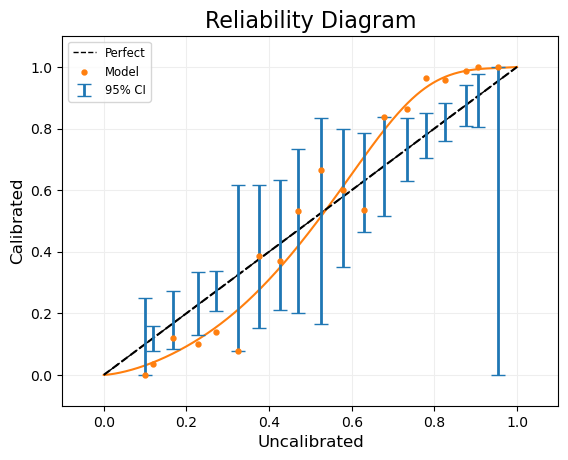

Calibrated probabilities


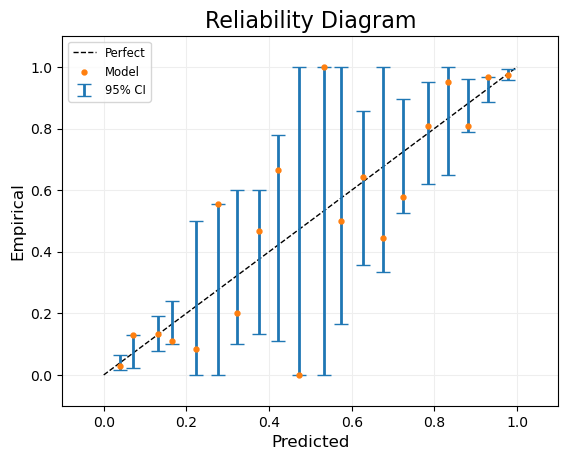

In [51]:
for m in [modelMLP, model_rf]:
    print(f"Model: {m.__class__.__name__}")
    calib1 = mli.SplineCalib()
    preds_calibration_set = m.predict_proba(X_test)[:,1]
    calib1.fit(preds_calibration_set, y_test)

    print(f'Calibration curve')
    mli.plot_reliability_diagram(y_test, preds_calibration_set)
    calib1.show_calibration_curve()
    plt.show()
    
    print(f'Calibrated probabilities')
    calibrated_preds = calib1.calibrate(preds_calibration_set)
    mli.plot_reliability_diagram(y_test, calibrated_preds)
    plt.show()

Model: MLPClassifier


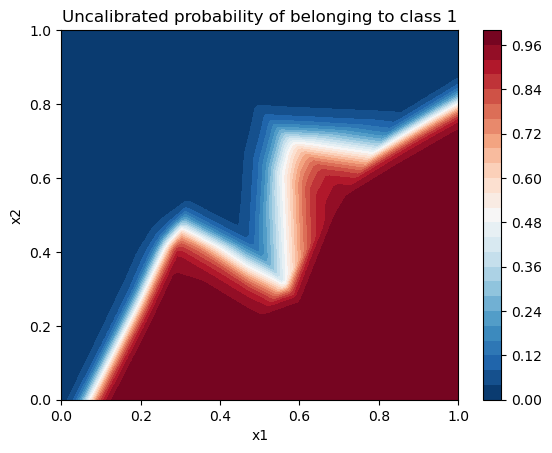

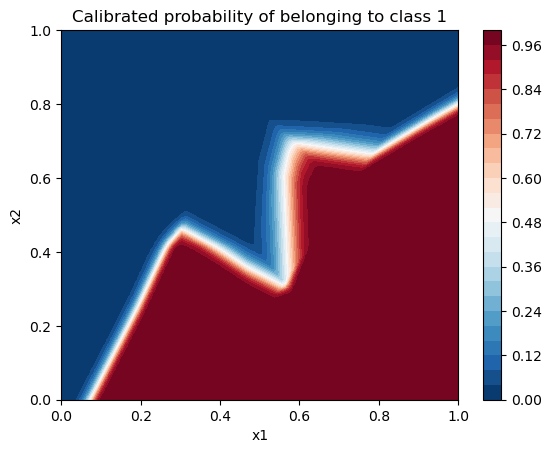

Model: RandomForestClassifier


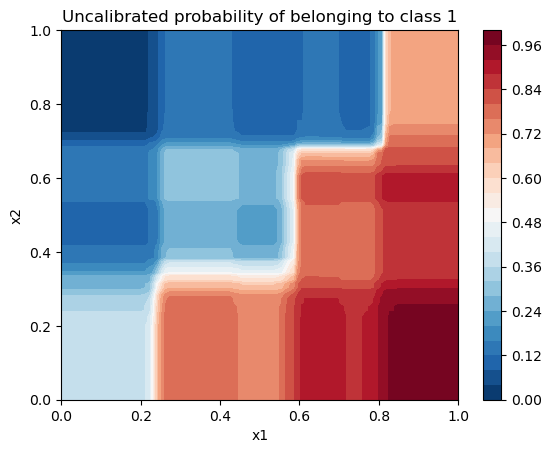

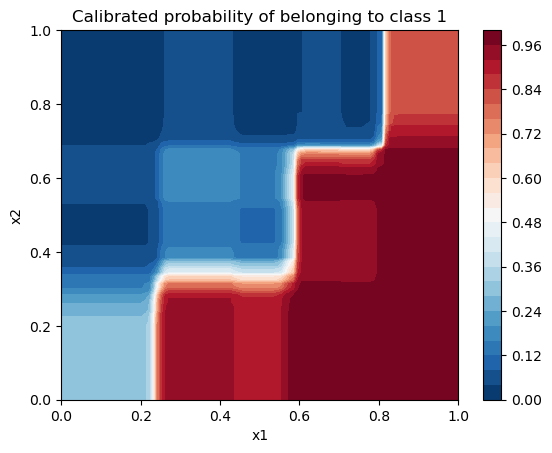

In [49]:
grid = np.linspace(np.min(X_train), np.max(X_train), 100)
xx, yy = np.meshgrid(grid, grid)

grid = np.c_[xx.ravel(), yy.ravel()]

for m in [modelMLP, model_rf]:
    
    print(f"Model: {m.__class__.__name__}")
    
    # Predict probabilities for each point in the grid
    probs = m.predict_proba(grid)[:, 1].reshape(xx.shape)

    # Plot the probabilities
    plt.contourf(xx, yy, probs, 25, cmap="RdBu_r", vmin=0, vmax=1)
    plt.title("Uncalibrated probability of belonging to class 1")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.colorbar()
    plt.show()
    
    
    probs_calibrated = calib1.calibrate(probs.ravel()).reshape(xx.shape)
    plt.contourf(xx, yy, probs_calibrated, 25, cmap="RdBu_r", vmin=0, vmax=1)
    plt.title("Calibrated probability of belonging to class 1")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.colorbar()
    plt.show()